# Suicide Rates Overview 1985 to 2016
### Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

### Inspiration:-

Suicide Prevention.

### Defining some Feature:-

##### 1> Human Development Index:
DescriptionThe Human Development Index is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.


## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('master.csv', index_col=0)
df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [24]:
df.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [3]:
# checking if there is any Nan value
df.isna().sum()

year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Data cleaning

In [4]:
df.shape

(27820, 11)

In [5]:
# Percentage of missing value in HDI for year column
19456/27820*100

69.93529834651329

In [6]:
# Since a lot of HDI value are missing Therefore we will have to drop the column
df1 = df.drop('HDI for year',1)
df1.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 10 columns):
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


## EDA

In [8]:
# use this function the total suicide case of a perticular country.
def total_suicide(country):
    total = df1.loc[country]['suicides_no'].sum()
    return total

In [9]:
total_suicide('Albania')

1970

In [10]:
df1.rename(columns= {'gdp_per_capita ($)': 'gdp_per_capita_$'},inplace= True)

In [11]:
df1.rename(columns= {' gdp_for_year ($) ': 'gdp_per_year_$'},inplace = True)

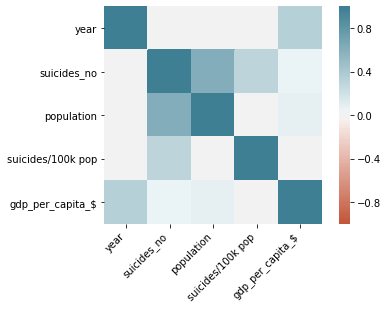

In [23]:
# let check the correlation of features between each other
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### From above correlation heatmap we can say that suicide_no changes with change in population. Suicide_no have a little positive relation with gdp_per_capita.

In [12]:
df1.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [13]:
# Use this feature to print the data set of perticular country with different feature 
def country(country,sex,age,generation):
    cn = df1.loc[country]
    dn = cn[(cn.sex==sex) & (cn.age==age) & (cn.generation==generation)]
    return dn

In [14]:
a= country('Albania','male','75+ years','G.I. Generation')
a

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
Albania,1988,male,75+ years,1,22300,4.48,Albania1988,"2,126,000,000",769,G.I. Generation
Albania,1989,male,75+ years,2,22500,8.89,Albania1989,"2,335,124,988",833,G.I. Generation
Albania,1992,male,75+ years,0,23900,0.00,Albania1992,"709,452,584",251,G.I. Generation
Albania,1993,male,75+ years,1,24200,4.13,Albania1993,"1,228,071,038",437,G.I. Generation
Albania,1994,male,75+ years,2,24600,8.13,Albania1994,"1,985,673,798",697,G.I. Generation
Albania,1995,male,75+ years,1,25100,3.98,Albania1995,"2,424,499,009",835,G.I. Generation
Albania,1996,male,75+ years,2,25400,7.87,Albania1996,"3,314,898,292",1127,G.I. Generation
Albania,1997,male,75+ years,3,25400,11.81,Albania1997,"2,359,903,108",793,G.I. Generation


Text(0.5, 1.0, 'suicide cases in Albania country with age group of 75+')

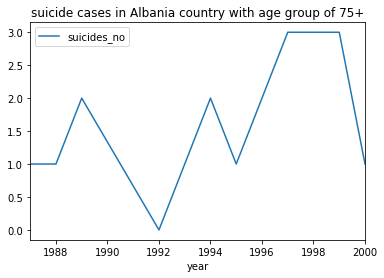

In [15]:
a.plot(y='suicides_no', x= 'year').set_title("suicide cases in Albania country with age group of 75+")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

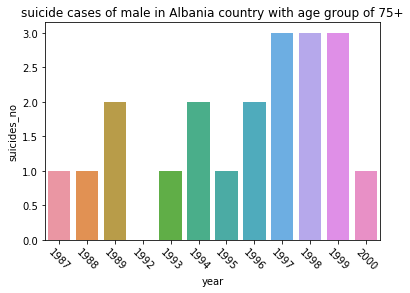

In [20]:
sns.barplot( y="suicides_no", x='year', data=a).set_title("suicide cases of male in Albania country with age group of 75+")
# Rotate x-labels
plt.xticks(rotation=-45)

In [21]:
# Lets check for female with 75+ age group
a= country('Albania','female','75+ years','G.I. Generation')
a

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
Albania,1988,female,75+ years,2,36400,5.49,Albania1988,"2,126,000,000",769,G.I. Generation
Albania,1989,female,75+ years,0,37000,0.00,Albania1989,"2,335,124,988",833,G.I. Generation
Albania,1992,female,75+ years,0,38700,0.00,Albania1992,"709,452,584",251,G.I. Generation
Albania,1993,female,75+ years,0,39300,0.00,Albania1993,"1,228,071,038",437,G.I. Generation
Albania,1994,female,75+ years,2,39900,5.01,Albania1994,"1,985,673,798",697,G.I. Generation
Albania,1995,female,75+ years,2,40800,4.90,Albania1995,"2,424,499,009",835,G.I. Generation
Albania,1996,female,75+ years,2,41200,4.85,Albania1996,"3,314,898,292",1127,G.I. Generation
Albania,1997,female,75+ years,2,42100,4.75,Albania1997,"2,359,903,108",793,G.I. Generation


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

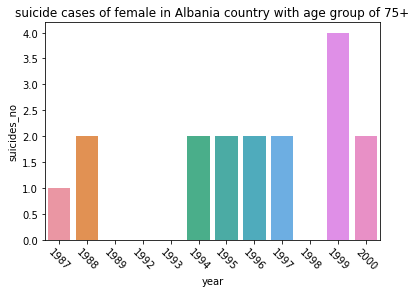

In [22]:
sns.barplot( y="suicides_no", x='year', data=a).set_title("suicide cases of female in Albania country with age group of 75+")
# Rotate x-labels
plt.xticks(rotation=-45)

In [37]:
df1['suicides_no'].sum()

6748420

In [41]:
df1['suicides_no'][df1['year']==2000].sum()

255832

In [43]:
(255832/6748420)*100

3.790991076429742

In [ ]:
for year in df1['year']:
    print(year)

In [47]:
df1['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [55]:
# We can use this function to find the percentage of the suicide rate per year
def percent(x):
    year_df = pd.DataFrame({'year':[1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016]})
    total_suicide = []
    percentage_per_year = []
    for year in year_df['year']:
        a = df1[x][df1['year']==year].sum()
        total_suicide.append(a)
        b = (a/6748420)*100
        percentage_per_year.append(b)
    year_df['total_suicide'] = total_suicide
    year_df['percentage_per_year'] = percentage_per_year
    return year_df

In [58]:
m = percent('suicides_no')
m.head()

,year,total_suicide,percentage_per_year
0,1987,126842,1.879581
1,1988,121026,1.793398
2,1989,160244,2.374541
3,1992,211473,3.133667
4,1993,221565,3.283213


## Change in pecentage of suicide rate with change in year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

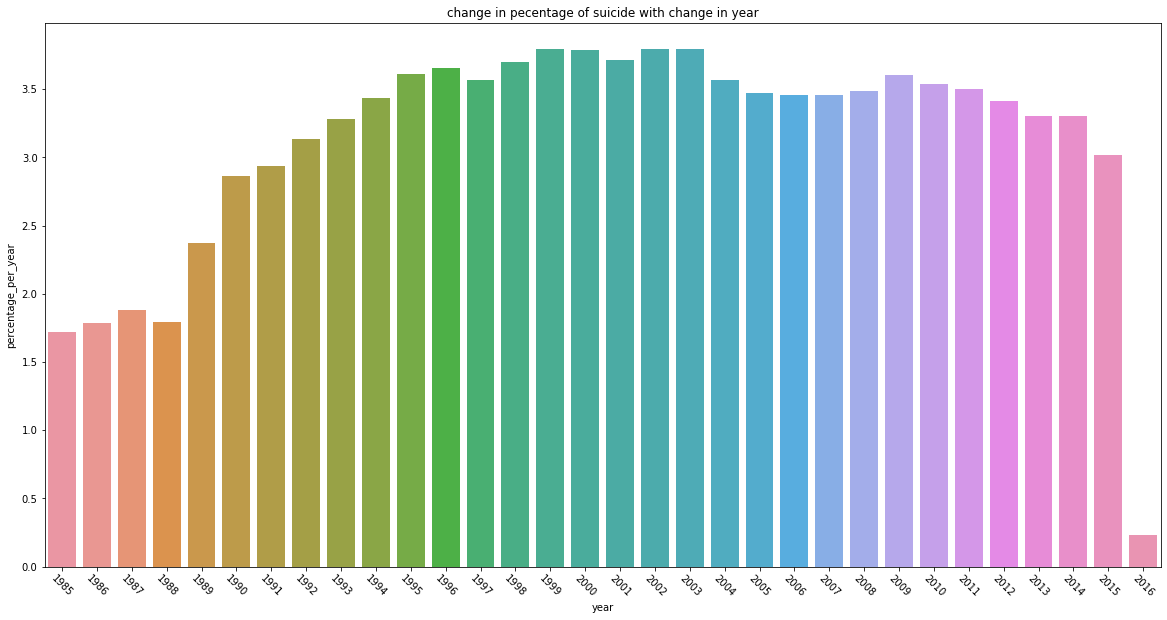

In [65]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.barplot( y="percentage_per_year", x='year', data=m).set_title("change in pecentage of suicide with change in year")
# Rotate x-labels
plt.xticks(rotation=-45)

In [66]:
df1['age'].value_counts()

55-74 years    4642
75+ years      4642
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64

In [90]:
df1.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [82]:
df.suicides_no.sum()

6748420

### Let see if Generation have some change in the suicide rate

In [83]:
(df1['suicides_no'][df1['generation']== 'Generation X'].sum()/6748420)*100

22.71352405451943

In [84]:
(df1['suicides_no'][df1['generation']== 'Silent'].sum()/6748420)*100

26.40238752181992

In [85]:
(df1['suicides_no'][df1['generation']== 'Millenials'].sum()/6748420)*100

9.238592144531609

In [86]:
(df1['suicides_no'][df1['generation']== 'Boomers'].sum()/6748420)*100

33.85233876966757

In [87]:
(df1['suicides_no'][df1['generation']== 'G.I. Generation'].sum()/6748420)*100

7.5574578938477455

In [88]:
(df1['suicides_no'][df1['generation']== 'Generation Z'].sum()/6748420)*100

0.23569961561372885

In [101]:
mn = df1.generation.unique()
mn[0]

'Generation X'

In [134]:
for n in mn:
    b= (df1['suicides_no'][df1['generation']== str(n)].sum()/6748420)*100
    print(b)

22.71352405451943
26.40238752181992
7.5574578938477455
33.85233876966757
9.238592144531609
0.23569961561372885


In [137]:
def gen_df(x):
    gh = pd.DataFrame({'Generation':['Generation X', 'Silent','G.I. Generation', 'Boomers', 'Millenials',
                                     'Generation Z']})
    suicides_no = []
    for gen in mn:
        b= (df1['suicides_no'][df1['generation']== str(gen)].sum()/6748420)*100
        suicides_no.append(b)
    gh['suicides_no'] = suicides_no
    return gh

In [140]:
bh = gen_df('suicides_no')
bh

,Generation,suicides_no
0,Generation X,22.713524
1,Silent,26.402388
2,G.I. Generation,7.557458
3,Boomers,33.852339
4,Millenials,9.238592
5,Generation Z,0.235700


(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text xticklabel objects>)

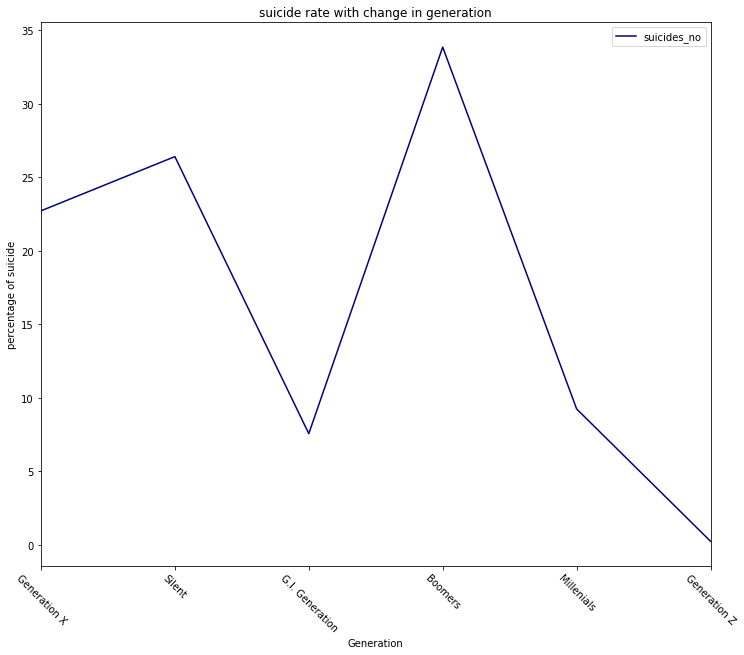

In [151]:
bh.plot(y="suicides_no", x= 'Generation',colormap='jet',figsize=(12, 10), markersize=10).set_title("suicide rate with change in generation")
plt.ylabel('percentage of suicide')
plt.xticks(rotation=-45)

### Suicide rate w.r.t to gdp per capita

In [184]:
df1.sort_values('gdp_per_capita_$',ascending=True).head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,1992,female,25-34 years,4,267400,1.50,Albania1992,"709,452,584",251,Boomers
Albania,1992,male,25-34 years,7,245500,2.85,Albania1992,"709,452,584",251,Boomers
Albania,1992,female,15-24 years,7,292400,2.39,Albania1992,"709,452,584",251,Generation X
Albania,1992,male,35-54 years,12,343800,3.49,Albania1992,"709,452,584",251,Boomers
Albania,1992,male,55-74 years,5,159500,3.13,Albania1992,"709,452,584",251,Silent


In [167]:
df1.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita_$
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


### let see if GDP per capita show some effect on suicide rate
Correlation heat map didn't show much.

In [209]:
(df1['suicides_no'][df1['gdp_per_capita_$']>=50259].sum()/6748420)*100

7.762498481125952

In [207]:
(df1['suicides_no'][df1['gdp_per_capita_$']<=10259].sum()/6748420)*100

39.635722139404486

In [210]:
(df1['suicides_no'][df1['gdp_per_capita_$']<=10259].sum()/6748420)*100 - (df1['suicides_no'][df1['gdp_per_capita_$']>=50259].sum()/6748420)*100

31.873223658278533

#### *with Low GDP per capita the suicide rate increase

## Top 5 country with high Suicide cases from 1985 to 2016

In [222]:
l = df1.index.unique()
l

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       ...
       'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan'],
      dtype='object', name='country', length=101)

In [223]:
l[0]

'Albania'

In [226]:
df1.loc['Albania']['suicides_no'].sum()

1970

In [252]:
# Use this function to get top 5 countries with high number of suicide cases. 
def top_5_high(x):
    l = df1.index.unique()
    new = pd.DataFrame()
    country = []
    total_suicides = []
    for n in l:
        country.append(n)
        p = df1.loc[n][x].sum()
        total_suicides.append(p)
    new['country'] = country
    new['total_suicides'] = total_suicides
    mp = new.sort_values('total_suicides',ascending =False)
    top = mp.head(5)
    return top

In [260]:
top_5_country_with_high_suicide_cases = top_5_high('suicides_no')
top_5_country_with_high_suicide_cases

,country,total_suicides
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

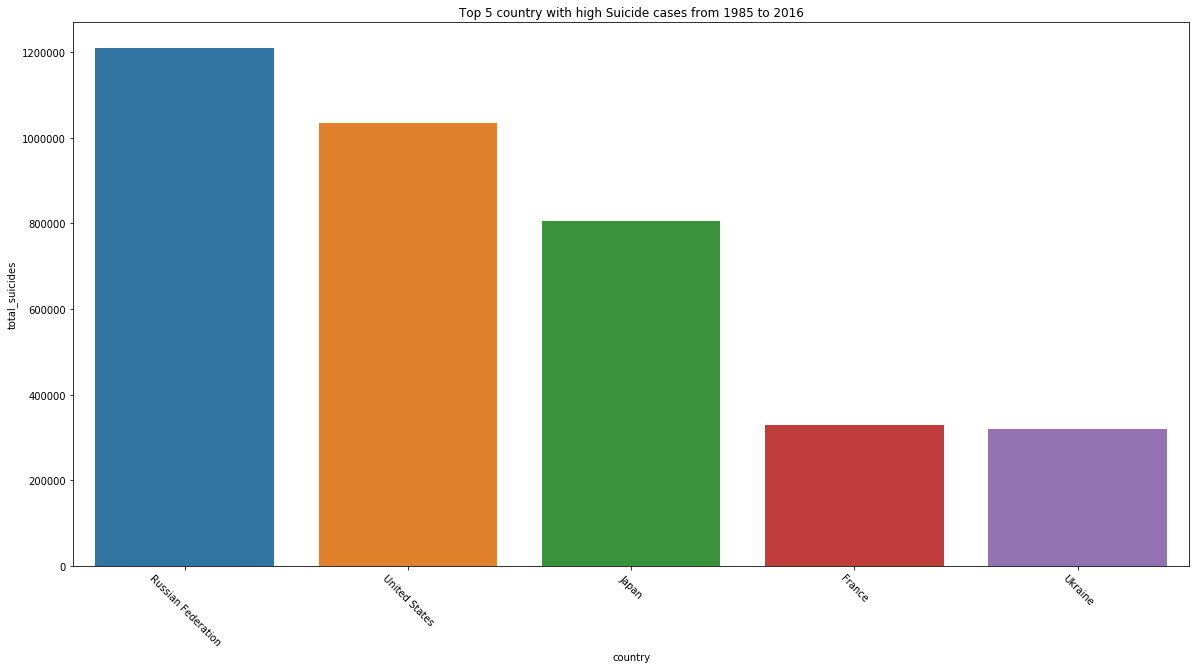

In [261]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.barplot( y="total_suicides", x='country', data=top_5_country_with_high_suicide_cases).set_title("Top 5 country with high Suicide cases from 1985 to 2016")
# Rotate x-labels
plt.xticks(rotation=-45)

## Top 5 country with low suicide cases from 1985 to 2016

In [256]:
# Use this function to get top 5 countries with low number of suicide cases. 
def top_5_low(x):
    l = df1.index.unique()
    new = pd.DataFrame()
    country = []
    total_suicides = []
    for n in l:
        country.append(n)
        p = df1.loc[n][x].sum()
        total_suicides.append(p)
    new['country'] = country
    new['total_suicides'] = total_suicides
    mp = new.sort_values('total_suicides',ascending =True)
    top = mp.head(5)
    return top

In [259]:
top_5_country_with_low_suicide_cases= top_5('suicides_no')
top_5_country_with_low_suicide_cases

,country,total_suicides
27,Dominica,0
76,Saint Kitts and Nevis,0
79,San Marino,4
1,Antigua and Barbuda,11
55,Maldives,20


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

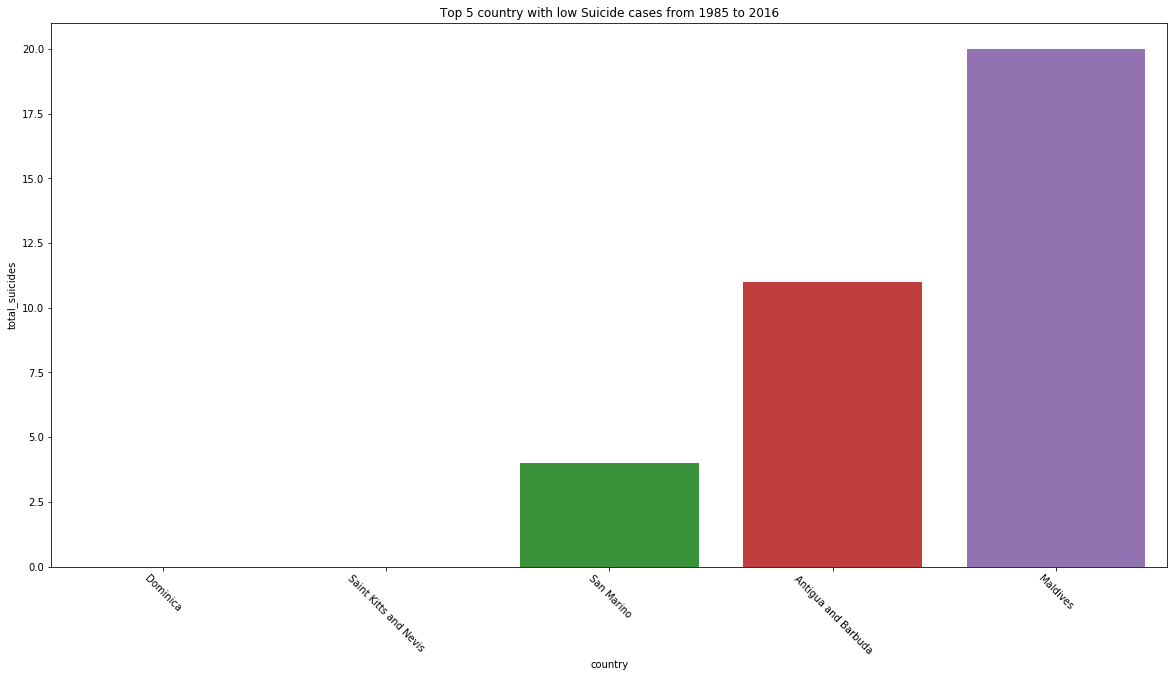

In [262]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.barplot( y="total_suicides", x='country', data=top_5_country_with_low_suicide_cases).set_title("Top 5 country with low Suicide cases from 1985 to 2016")
# Rotate x-labels
plt.xticks(rotation=-45)

In [292]:
years_from_1985to2000 = df1[df1['year']<=2000]
years_from_1985to2000.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [304]:
years_from_2000to2016 = df1[df1['year']>2000]
years_from_2000to2016.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year_$,gdp_per_capita_$,generation
country,,,,,,,,,,
Albania,2001,male,25-34 years,22,206484,10.65,Albania2001,"4,060,758,804",1451,Generation X
Albania,2001,male,35-54 years,34,378826,8.98,Albania2001,"4,060,758,804",1451,Boomers
Albania,2001,male,55-74 years,11,196670,5.59,Albania2001,"4,060,758,804",1451,Silent
Albania,2001,female,75+ years,2,47254,4.23,Albania2001,"4,060,758,804",1451,Silent
Albania,2001,male,15-24 years,10,256039,3.91,Albania2001,"4,060,758,804",1451,Millenials


In [305]:
df1['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

##  Let see suicide rate of different generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

### 1. Let see suicide rate of Boomers generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [313]:
(years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Boomers'].sum()

1167952

In [331]:
Boomer_1985to2000= round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Boomers'].sum()/6748420)*100,1)
Boomer_1985to2000

17.3

In [312]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Boomers'].sum()

1116546

In [332]:
Boomer_2000to2016 = round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Boomers'].sum()/6748420)*100,1)
Boomer_2000to2016

16.5

##### there has been a little drop after the beginning of new century

### 2. Let see suicide rate of Generation X generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [310]:
years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Generation X'].sum()

652040

In [333]:
Generation_X_1985to2000 = round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Generation X'].sum()/6748420)*100,1)
Generation_X_1985to2000

9.7

In [311]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Generation X'].sum()

880764

In [334]:
Generation_X_2000to2016= round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Generation X'].sum()/6748420)*100,1)
Generation_X_2000to2016

13.1

##### there has been an increase in the suicide rate after the beginning of the new century

### 3. Let see suicide rate of Silent generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [299]:
years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Silent'].sum()

845251

In [335]:
Silent_1985to2000 = round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Silent'].sum()/6748420)*100,1)
Silent_1985to2000

12.5

In [300]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Silent'].sum()

936493

In [339]:
Silent_2000to2016 = round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Silent'].sum()/6748420)*100,1)
Silent_2000to2016

13.9

##### There has been an increase in the suicide rate after the beginning of the new century

### 4. Let see suicide rate of Millenials generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [301]:
years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Millenials'].sum()

18631

In [337]:
Millenials_1985to2000 = round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Millenials'].sum()/6748420)*100,1)
Millenials_1985to2000

0.3

In [302]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Millenials'].sum()

604828

In [340]:
Millenials_2000to2016 = round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Millenials'].sum()/6748420)*100,1)
Millenials_2000to2016

9.0

##### There has been a Great increase in the suicide rate after the beginning of the new century

### 5. Let see suicide rate of G.I. Generation generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [306]:
years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='G.I. Generation'].sum()

510009

In [341]:
GI_Generation_1985to2000 = round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='G.I. Generation'].sum()/6748420)*100,1)
GI_Generation_1985to2000

7.6

In [307]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='G.I. Generation'].sum()

0

In [342]:
GI_Generation_2000to2016= round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='G.I. Generation'].sum()/6748420)*100,1)
GI_Generation_2000to2016

0.0

##### The number suicide rate has droped to zero after the starting of the new  century
The reasion behind this great drop is because this generations are old one the didn't exist in the new Century.

### 6. Let see suicide rate of Generation Z generation in 2 datasets from 1985 to 2000 and from 2001 to 2016

In [308]:
years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Generation Z'].sum()

0

In [343]:
Generation_Z_1985to2000 = round((years_from_1985to2000['suicides_no'][years_from_1985to2000['generation']=='Generation Z'].sum()/6748420)*100,1)
Generation_Z_1985to2000

0.0

In [309]:
years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Generation Z'].sum()

15906

In [344]:
Generation_Z_2000to2016 = round((years_from_2000to2016['suicides_no'][years_from_2000to2016['generation']=='Generation Z'].sum()/6748420)*100,1)
Generation_Z_2000to2016

0.2

##### The number of suicide rate has shown a great increase after the starting of new century
Pew Research defines members of Generation Z as anyone born between 1997 and 2012. That means the group spans ages 7 to 22 in 2019. The organization cites important political, economic, and technological factors that helped them determine the cutoff from Millennial to Generation Z.

In [349]:
pie_df = pd.DataFrame({'percentage_of_suicide': [17.3, 16.5 , 9.7, 13.1, 12.5, 13.9, 0.3, 9.0, 7.6, 0.0, 0.0, 0.2]},
                  index=['Boomer_1985to2000', 'Boomer_2000to2016', 'Generation_X_1985to2000', 'Generation_X_2000to2016',
                         'Silent_1985to2000', 'Silent_2000to2016', 'Millenials_1985to2000', 'Millenials_2000to2016',
                        'GI_Generation_1985to2000', 'GI_Generation_2000to2016', 'Generation_Z_1985to2000',
                        'Generation_Z_2000to2016'])

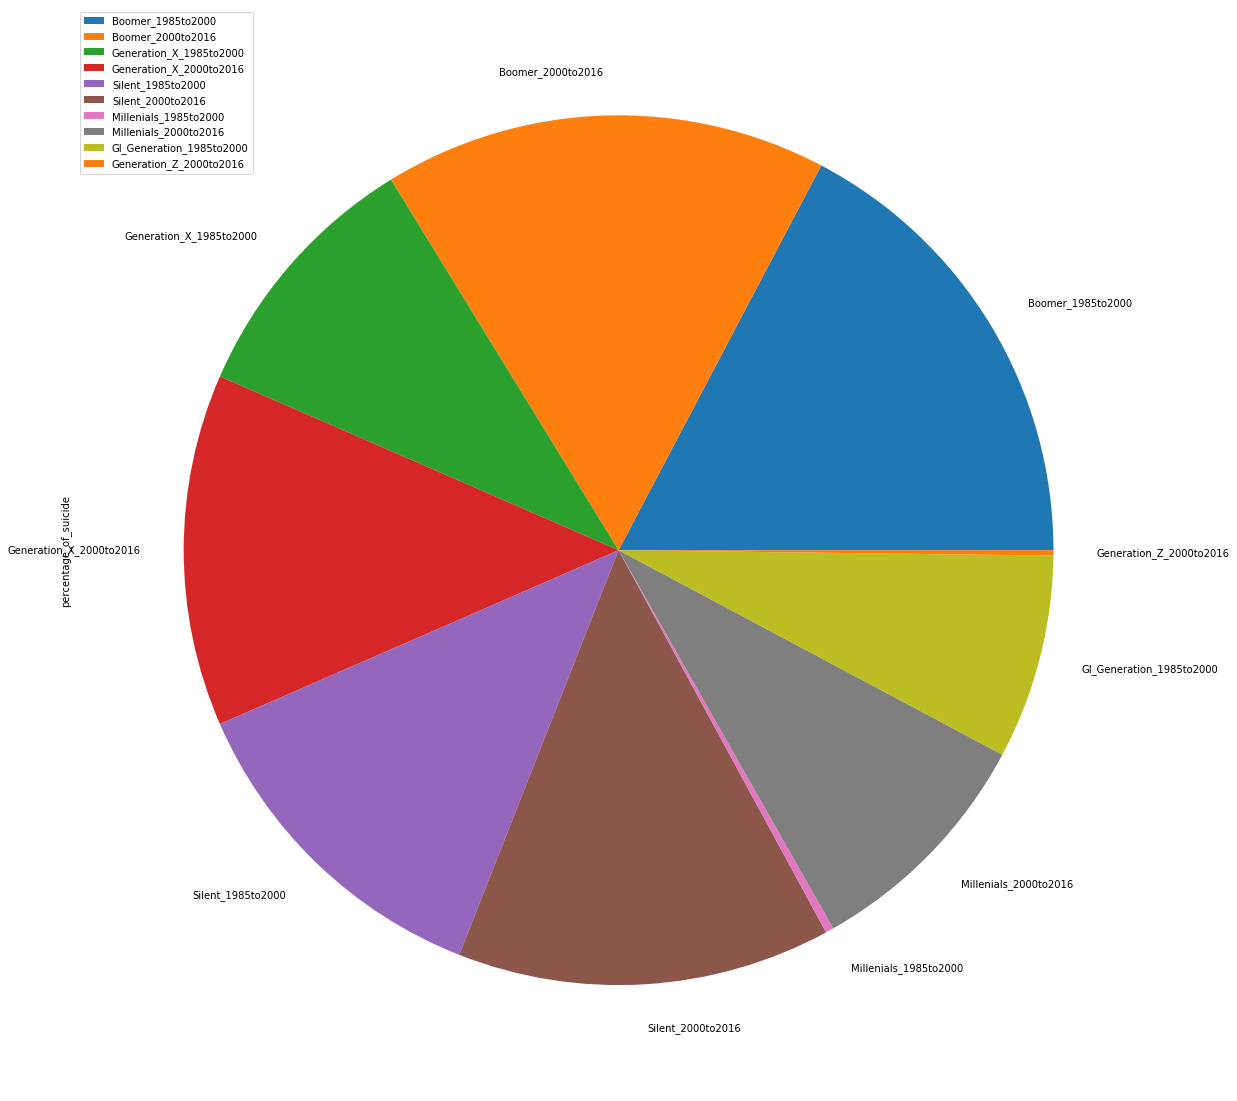

In [357]:
plot = pie_df.plot.pie(subplots=True, figsize=(20, 20))

#### Using MatplotLib

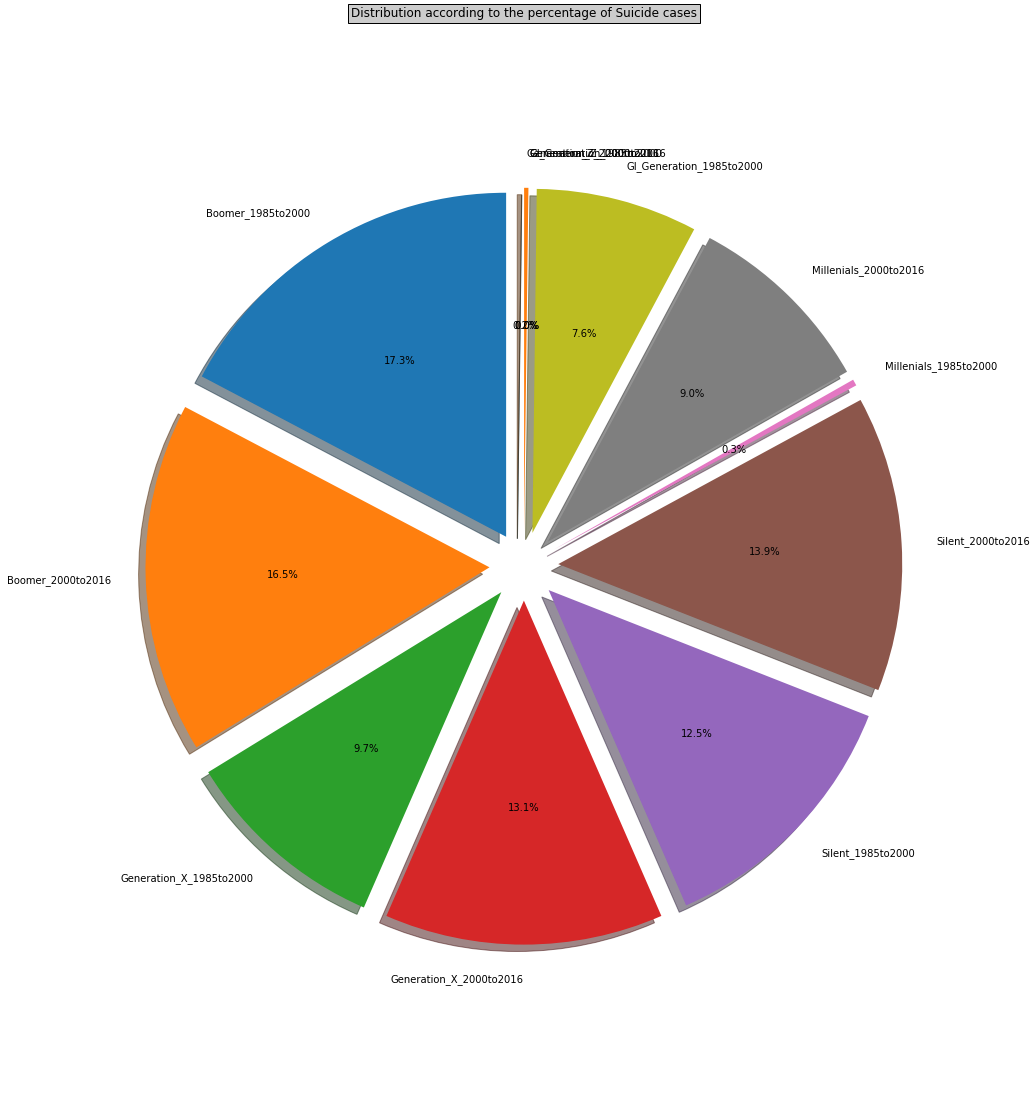

In [378]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Boomer_1985to2000', 'Boomer_2000to2016', 'Generation_X_1985to2000', 'Generation_X_2000to2016', 'Silent_1985to2000', 'Silent_2000to2016', 'Millenials_1985to2000', 'Millenials_2000to2016','GI_Generation_1985to2000', 'GI_Generation_2000to2016', 'Generation_Z_1985to2000','Generation_Z_2000to2016'
sizes = [17.3, 16.5 , 9.7, 13.1, 12.5, 13.9, 0.3, 9.0, 7.6, 0.0, 0.0, 0.2]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 1st slice as it is having high value.
fig1, ax1 = plt.subplots(figsize=(15,20))
ax1.set_title('Distribution according to the percentage of Suicide cases', 
             bbox={'facecolor':'0.8', 'pad':3})
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
